# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

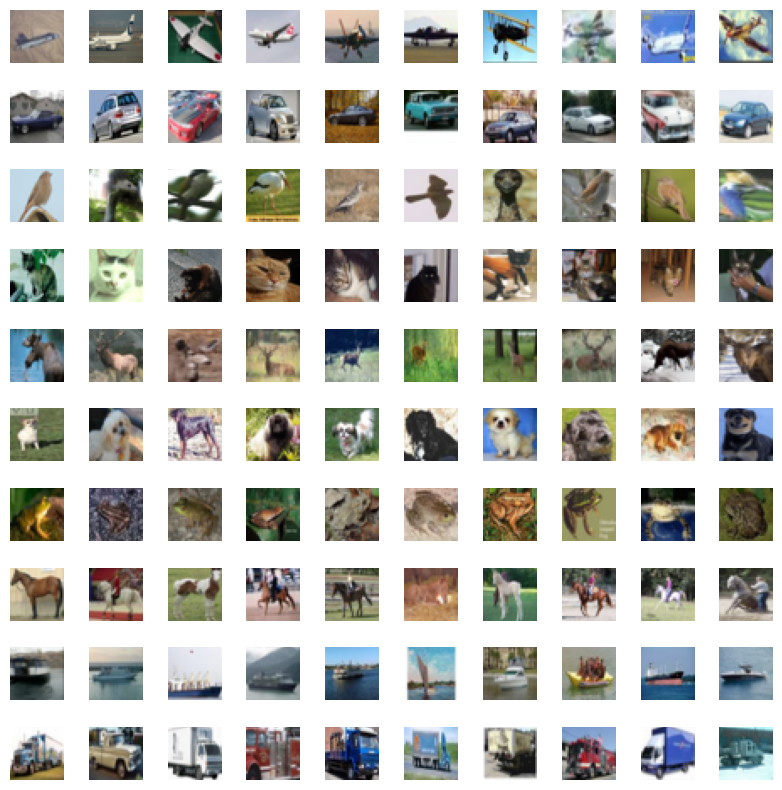

(50000, 10)
(10000, 10)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for class_idx in range(10):
    class_images = x_train[y_train.flatten() == class_idx]
    random_indices = np.random.choice(len(class_images), 10, replace=False)
    
    for i, idx in enumerate(random_indices):
        plt.subplot(10, 10, class_idx * 10 + i + 1)
        plt.imshow(class_images[idx])
        plt.axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()

from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

print(y_train_one_hot.shape)
print(y_test_one_hot.shape) 

x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

print(x_train_normalized.min(), x_train_normalized.max())

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [5]:
from keras.backend import clear_session
clear_session()

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Softmax
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.backend import clear_session
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4043 - loss: 1.6482 - val_accuracy: 0.5759 - val_loss: 1.2269
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5837 - loss: 1.1785 - val_accuracy: 0.5960 - val_loss: 1.1395
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6334 - loss: 1.0488 - val_accuracy: 0.6183 - val_loss: 1.1009
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6689 - loss: 0.9608 - val_accuracy: 0.6030 - val_loss: 1.1267
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6894 - loss: 0.8896 - val_accuracy: 0.6140 - val_loss: 1.1094
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7107 - loss: 0.8275 - val_accuracy: 0.6313 - val_loss: 1.0938
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7295 - loss: 0.7770 - val_accuracy: 0.6465 - val_loss: 1.0443
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7474 - los

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.backend import clear_session
from keras.optimizers import SGD

clear_session()
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=SGD(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()
history = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.1630 - loss: 2.2570 - val_accuracy: 0.2619 - val_loss: 2.1227
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - accuracy: 0.2711 - loss: 2.0830 - val_accuracy: 0.3143 - val_loss: 1.9903
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 158ms/step - accuracy: 0.3088 - loss: 1.9687 - val_accuracy: 0.3313 - val_loss: 1.9162
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.3360 - loss: 1.9086 - val_accuracy: 0.3416 - val_loss: 1.8898
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - accuracy: 0.3454 - loss: 1.8709 - val_accuracy: 0.3617 - val_loss: 1.8396
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.3665 - loss: 1.8338 - val_accuracy: 0.3719 - val_loss: 1.8113
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 126ms/step - accuracy: 0.3795 - loss: 1.8011 - val_accuracy: 0.3756 - val_loss: 1.7918
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.3833 - loss: 1.7805 - val_accura

*   Plot the cross entropy loss curve and the accuracy curve

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.5636 - loss: 1.2495 - val_accuracy: 0.5472 - val_loss: 1.2670
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.5713 - loss: 1.2326 - val_accuracy: 0.5473 - val_loss: 1.2779
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.5750 - loss: 1.2189 - val_accuracy: 0.5543 - val_loss: 1.2695
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.5747 - loss: 1.2170 - val_accuracy: 0.5557 - val_loss: 1.2515
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.5772 - loss: 1.2163 - val_accuracy: 0.5381 - val_loss: 1.3135
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.5775 - loss: 1.2177 - val_accuracy: 0.5672 - val_loss: 1.2278
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.5795 - loss: 1.2013 - val_accuracy: 0.5648 - val_loss: 1.2473
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.5786 - loss: 1.2130 - val_accuracy: 0.5

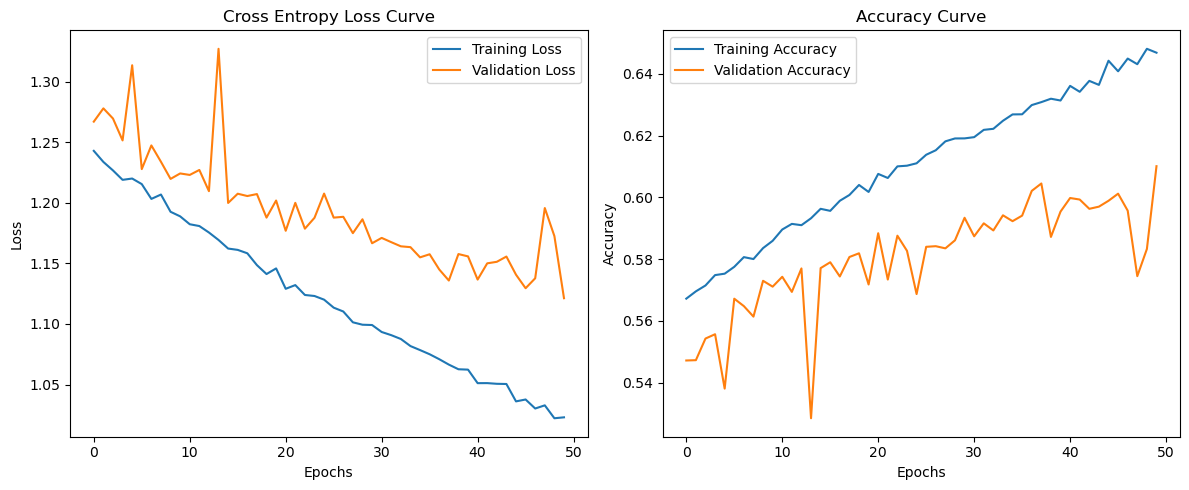

In [9]:
import matplotlib.pyplot as plt
history = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_test, y_test))
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.metrics import confusion_matrix
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD
from keras.backend import clear_session

clear_session()

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=SGD(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

history_deeper = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 316ms/step - accuracy: 0.1297 - loss: 2.2717 - val_accuracy: 0.2415 - val_loss: 2.1375
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 354ms/step - accuracy: 0.2503 - loss: 2.0923 - val_accuracy: 0.3029 - val_loss: 1.9755
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 408ms/step - accuracy: 0.2934 - loss: 1.9919 - val_accuracy: 0.3281 - val_loss: 1.9054
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 474ms/step - accuracy: 0.3277 - loss: 1.9089 - val_accuracy: 0.3537 - val_loss: 1.8329
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 391ms/step - accuracy: 0.3574 - loss: 1.8420 - val_accuracy: 0.3492 - val_loss: 1.8374
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 423ms/step - accuracy: 0.3681 - loss: 1.8031 - val_accuracy: 0.3847 - val_loss: 1.7539
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 402ms/step - accuracy: 0.3815 - loss: 1.7591 - val_accuracy: 0.3900 - val_loss: 1.7497
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 442ms/step - accuracy: 0.3936 - loss: 1.7314 - val_accu

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [11]:
#answered in previous question 

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

NameError: name 'history_' is not defined

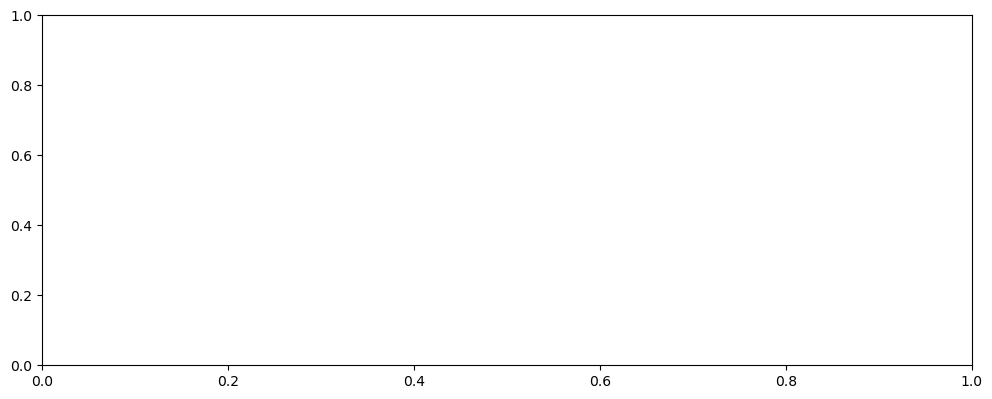

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(history_.history['loss'], label='Original Model Training Loss')
plt.plot(history_.history['val_loss'], label='Original Model Validation Loss')
plt.plot(history_deeper.history['loss'], label='Deeper Model Training Loss')
plt.plot(history_deeper.history['val_loss'], label='Deeper Model Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history_.history['accuracy'], label='Original Model Training Accuracy')
plt.plot(history_.history['val_accuracy'], label='Original Model Validation Accuracy')
plt.plot(history_deeper.history['accuracy'], label='Deeper Model Training Accuracy')
plt.plot(history_deeper.history['val_accuracy'], label='Deeper Model Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


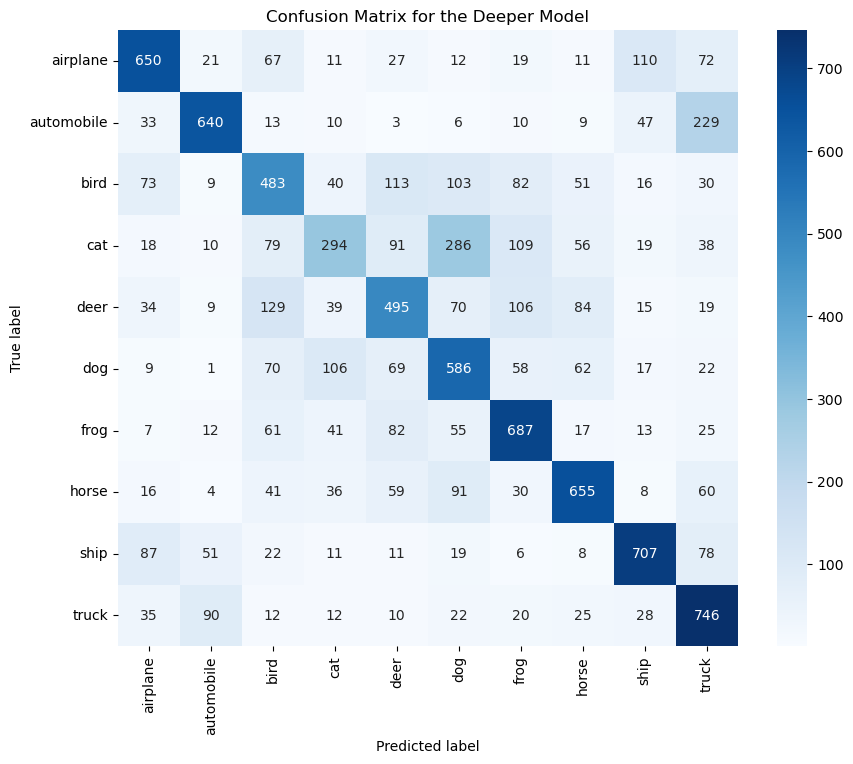

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer', 
                         'dog', 'frog', 'horse', 'ship', 'truck'],
            yticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer', 
                         'dog', 'frog', 'horse', 'ship', 'truck'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for the Deeper Model')
plt.show()


**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5967 - loss: 1.1331
0.5942999720573425


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [10]:
from keras.backend import clear_session
clear_session()

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.backend import clear_session
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

datagen = ImageDataGenerator(rescale=1./255)
x_train = datagen.flow(x_train, batch_size=512).next()
x_test = datagen.flow(x_test, batch_size=512).next()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer=SGD(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_test, y_test))


AttributeError: 'NumpyArrayIterator' object has no attribute 'next'

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.backend import clear_session

clear_session()

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = np.array([np.resize(image, (64, 64, 3)) for image in x_train])
x_test = np.array([np.resize(image, (64, 64, 3)) for image in x_test])

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer=SGD(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

newest_history = model.fit(x_train, y_train, batch_size=512, epochs=10, validation_data=(x_test, y_test))

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer', 
                         'dog', 'frog', 'horse', 'ship', 'truck'],
            yticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer', 
                         'dog', 'frog', 'horse', 'ship', 'truck'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for the Deeper Model')
plt.show()


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions allow the network to learn complex patterns and improve its performance. They also introoduce non-linearity and control the output of the neurons.


_

2 - Key Differences between sigmoid and softmax:

Sigmoid transforms the output into a range between 0 and 1 for binary classification, whereas softmax transforms it into probability distribution across classes, suitable for multi-class classification problems.

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Categorial cossentropy is issued for tasks that have more than two classes, whereas binary crossentropy works for binary classification, that means, with only two classes.
_
